In [2]:
# !pip install opencv-python

In [3]:
# Import OpenCV Library and check the version

import cv2
print (cv2.__version__)

4.7.0


# Read image

In [36]:
# Load an color image in grayscale
import numpy as np

img = cv2.imread('/content/messi.jpg',0)

In [37]:
# cv2.imread will read the image in the numpy array

print(img)
print(img.shape)

[[ 66  66  66 ...  33  33  33]
 [ 66  66  66 ...  32  32  32]
 [ 65  65  65 ...  32  32  32]
 ...
 [164 164 164 ...  13  13  13]
 [169 169 169 ...  13  13  13]
 [173 173 173 ...  13  13  13]]
(168, 300)


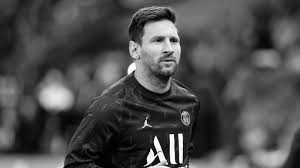

In [38]:
# Even if the image path is wrong, it won’t throw any error, but print img will give you None

from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [39]:
# Write an image

# Use the function cv2.imwrite() to save an image.

# First argument is the file name, second argument is the image you want to save.

cv2.imwrite('messigray.png',img)


True

## Using Matplotlib

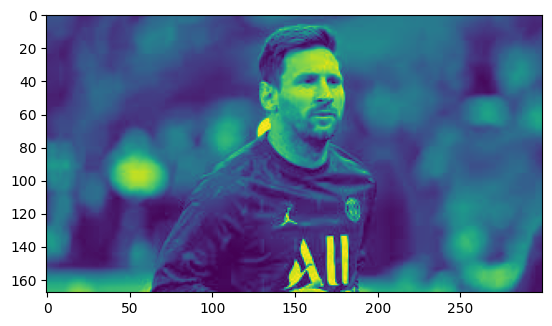

In [40]:
import matplotlib.pyplot as plt

img = cv2.imread('/content/messi.jpg',0)

plt.imshow(img)

[[[ 56  65  96]
  [ 55  66  98]
  [ 53  66  98]
  ...
  [ 34  31  38]
  [ 33  32  38]
  [ 33  32  38]]

 [[ 55  66  98]
  [ 53  66  98]
  [ 52  67 100]
  ...
  [ 33  30  37]
  [ 33  30  37]
  [ 33  30  37]]]
uint8


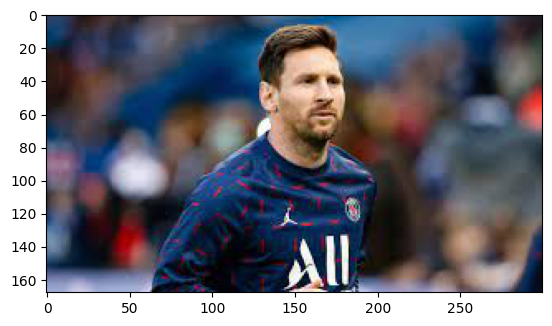

In [51]:
import matplotlib.image as mpimg

pltimg = mpimg.imread('messi.jpg')

print(pltimg[:2])
print(pltimg.dtype)

plt.imshow(pltimg)

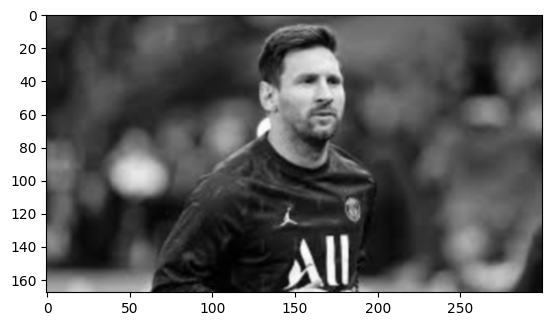

In [42]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

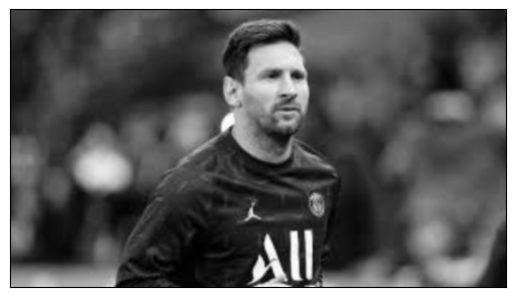

In [43]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

## Using PIL Library

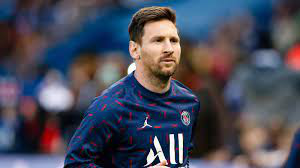

Filename                 : messi.jpg
Image Size               : (300, 168)
Image Height             : 168
Image Width              : 300
Image Format             : JPEG
Image Mode               : RGB
Image is Animated        : False
Frames in Image          : 1


In [64]:
from PIL import Image
from PIL.ExifTags import TAGS

# path to the image or video
imagename = "messi.jpg"

# read the image data using PIL
image = Image.open(imagename)

image.show()

# extract other basic metadata
info_dict = {
    "Filename": image.filename,
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image is Animated": getattr(image, "is_animated", False),
    "Frames in Image": getattr(image, "n_frames", 1)
}

for label,value in info_dict.items():
    print(f"{label:25}: {value}")

# Image to array and array to image in PIL Library

In [66]:
# path to the image or video
imagename = "messi.jpg"

# read the image data using PIL
image = Image.open(imagename)

print(image) # pil image will not read the image in the form of array as in case 
# of cv2, instead it read as an image object
# to convert the image read to numpy array we need use the np.asarry function

img1 = np.asarray(image)

print(img1.dtype)
# print(img1)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x168 at 0x7FC62EB47EE0>
uint8


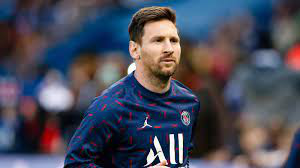

In [67]:
ary_img = Image.fromarray(img1)
ary_img.show()

# Operations in digital image processing.

## Affine Transformations
Affine transformations - Rotation, Translation, Shear, scaling

Affine transformations are geometric transformation that preserves lines and parallelism (but not necessarily distances and angles).

In [69]:
import pylab

In [88]:
def show_img(img):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

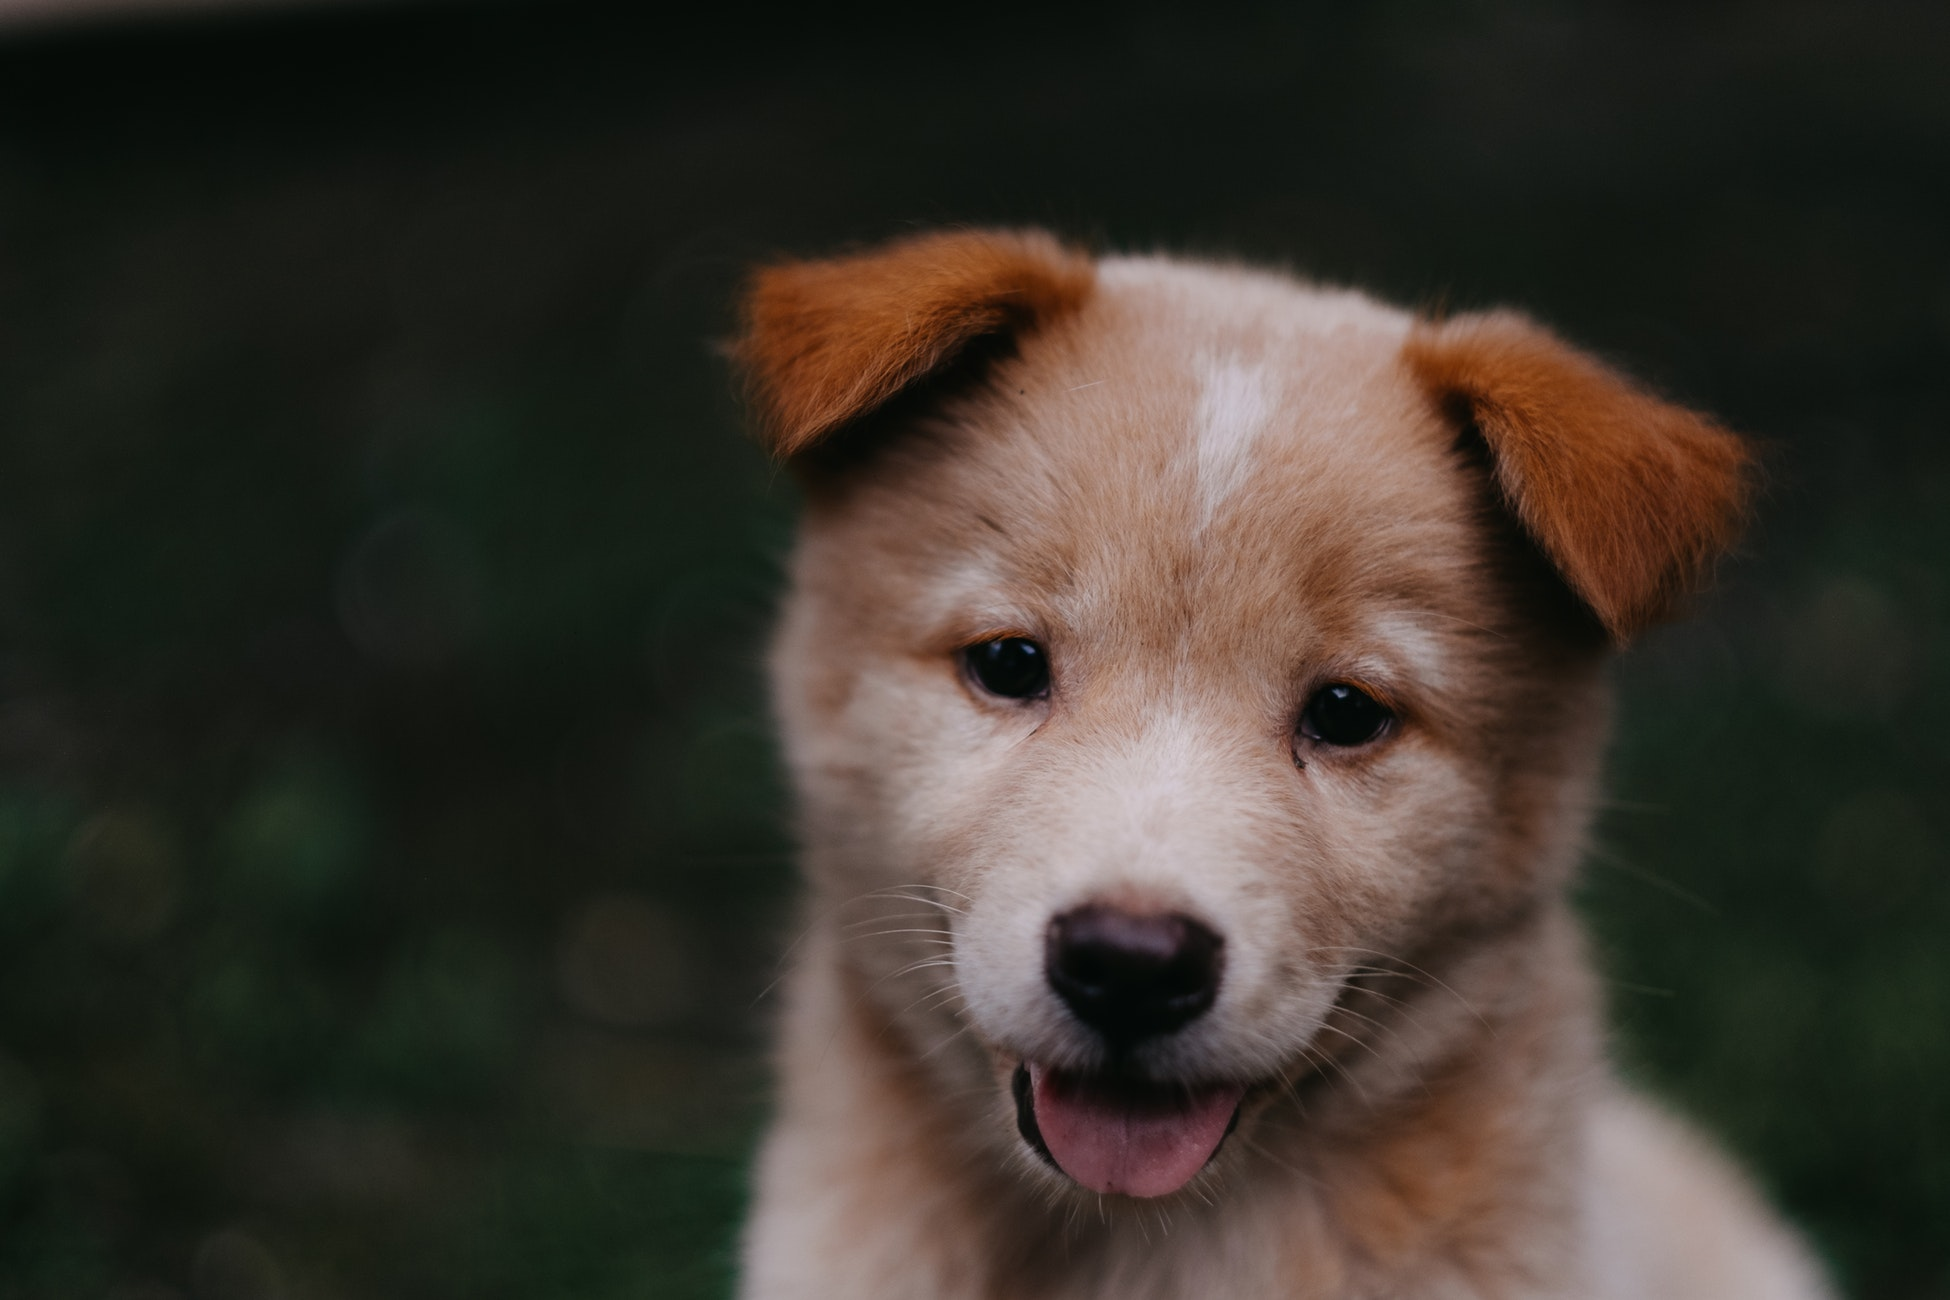

In [89]:
from google.colab.patches import cv2_imshow
mydog = cv2.imread("puppy.jpg")
cv2_imshow(mydog)

In [90]:
print(mydog.shape)

(1300, 1950, 3)


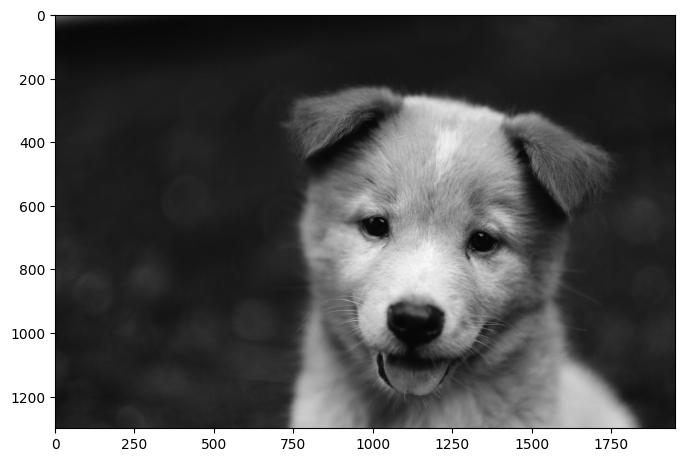

In [91]:
# Converting the colour image to grayscale

graydog = cv2.cvtColor(mydog, cv2.COLOR_BGR2GRAY)
show_img(graydog)

## Syntax for any affine transformation to be done


cv2.warpAffine(image, transformationmatrix, (width_transformedimage, height_transformedimage))

**Transformation matrix** 
[[a11, a12, b1],
[a21, a22, b2]]

**Rotation matrix**
[[cos(a), -sin(a), 0],
 [sin(a), cos(a), 0]]

**Changing a11 and a22 leads to ------> Scaling**

**Changing a12 and a21 leads to ------> Shearing**

**changing b1 and b2 will lead to translation ------> Translation**

In [96]:
height, width = graydog.shape[:2]
dogcenter = height/2,width/2

### Rotation

In [97]:
rotate_matrix = cv2.getRotationMatrix2D(center = dogcenter, angle = 45, scale = 1)

In [98]:
rotated_dog = cv2.warpAffine(graydog.copy(),rotate_matrix, (width, height))

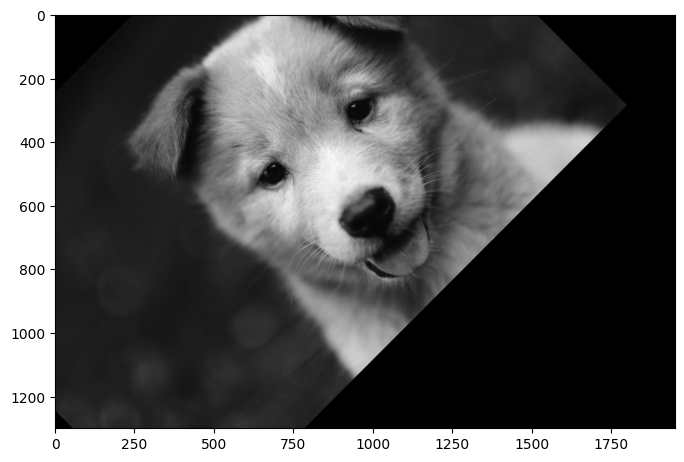

In [99]:
show_img(rotated_dog)

### Translation

In [100]:
horizontalshift = width/2
verticalshift = 0
translation_matrix = np.array([
                               [1,0, horizontalshift],
                               [0,1, verticalshift]
], dtype = np.float32)

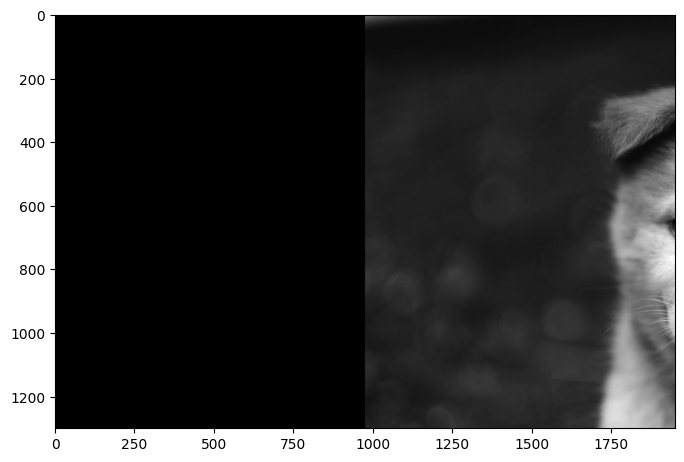

In [101]:
translation_dog = cv2.warpAffine(graydog.copy(), translation_matrix, (width, height))
show_img(translation_dog)

### Scaling

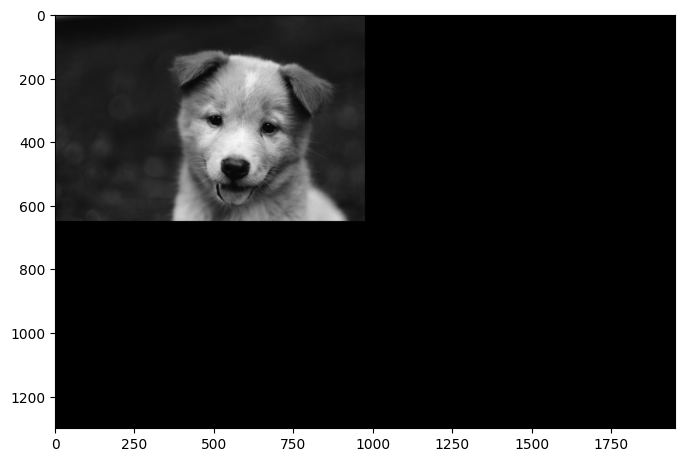

In [102]:
horizontalscalefactor = 0.5
verticalscalefactor = 0.5
scaling_matrix = np.array([
                               [horizontalscalefactor,0, 0],
                               [0,verticalscalefactor, 0]
], dtype = np.float32)
scaling_dog = cv2.warpAffine(graydog.copy(), scaling_matrix, (width, height))
show_img(scaling_dog)

# Shearing
Shear tool is used to shift one part of an image, a layer, a selection or a path to a direction and the other part to the opposite direction. For instance, a horizontal shearing will shift the upper part to the right and the lower part to the left. A rectangle becomes a diamond.

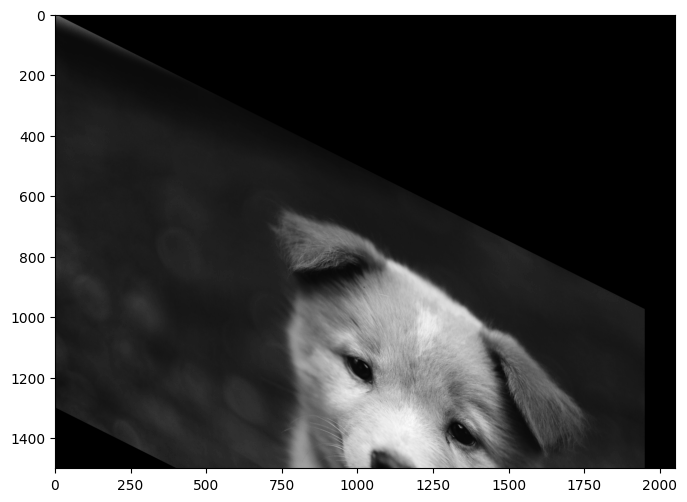

In [103]:
shearing_matrix = np.array([
                            [1,0, 0],
                            [0.5,1, 0]
], dtype = np.float32)
shearing_dog = cv2.warpAffine(graydog.copy(), shearing_matrix, (width+100, height+200))
show_img(shearing_dog)

# Morphological Operations

Morphology generally concerned with shape and properties of objects. 
Two basic operations are Erosion and Dilation.

Dilation: Adds pixels to the boundaries of objects in an image. (expanding shapes)

Erosion: Removes pixels on object boundaries.

The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image.

A structuring element is a shape mask used in the basic morphological operations. They can be any shape and size that is digitally representable, and each has an origin.